### Una nave espacial que puede ir a velocidades relativistas (v = 0.4c) emprende un viaje en la dirección del centro de la constelación del Can Mayor. Utilizando los datos de cma data.csv:

#### 1. Haga una gráfica RA/DEC que muestre el efecto de colimación relativı́stico visto desde la nave para cada estrella en la constelación. En la gráfica se deben ver las posiciones originales de las estrellas vs. las observadas desde la nave. No es necesario hacer una proyección, grafique los puntos sobre un plano cartesiano.

Para esto primero debemos analizar nuestra tabla de datos, la cual contiene:

| RA | DEC | lam |
|---|---|---|
|101.2885411|-16.71314306|601|
|104.6564445|-28.97208931|601|
|107.0978585|-26.39320776|701|
|95.6749475|-17.95591658|601|
|111.023771|-29.30311979|601|
|95.07827982|-30.06337656|601|
|105.7561399|-23.83330131|601|
|105.4297988|-27.93484165|774|
|102.4602729|-32.50848752|601|
|103.5331452|-24.18422296|774|

En este punto solo vamos a necesitar las columnas de RA y DEC. El efecto de colimación relativistico lo observara nuestra nave gracias a la aberración de la luz, para eso vamos a usar para nuestro codigo las ecuacniones:

\begin{equation}
\tan\theta = \frac{\sin\theta '}{\gamma(\cos\theta ' + \frac{v}{c})}
\end{equation}

> Recordemos que $\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$.

Como la nave está viajando hacia el centro de la constelación necesitamos saber cual es el centro de la constelación y para eso simplemente hacemos una promedio de los datos de DEC y RA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tabla = pd.read_csv("cma_data.csv") #Leer los datos ar,dec,lam

RA = tabla['ra']
DEC = tabla['dec']
gamma = 1/((1-(0.4)**2)**0.5)

#Centro de la constelación
f = (DEC[0] + DEC[1] + DEC[2] + DEC[3] + DEC[4] + DEC[5] + DEC[6] + DEC[7] + DEC[8] + DEC[9])/len(DEC)
l = (RA[0] + RA[1] + RA[2] + RA[3] + RA[4] + RA[5] + RA[6] + RA[7] + RA[8] + RA[9])/len(RA)

print(f"Centro de la constelación en (RA,DEC): ({l},{f})")

Centro de la constelación en (RA,DEC): (103.199919922,-25.786170650000003)


Primero restamos la el centro de la constalación con los datos de DEC y RA, con esa recta obtenemos nuestro $\theta '$ de ahí reemplazamos y tenemos que:$$\theta = \tan^{-1}(\frac{\sin \theta '}{\gamma(\cos \theta ' +1)})$$

Después de obtener el valor de $\theta$ ese ángulo representa el ángulo (normalmente es un valor pequeño) de beaming que se presenta en ese punto del espacio. Luego se resta el beaming con el centro de la constelación y de esa manera obtenemos las posiciones de las estrellas desde la nave en el plano cartesiano.

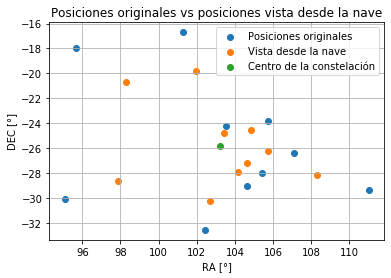

In [2]:
dec = (f-DEC)*np.pi/180 #se cambia primero a radianes porque numpy te da los valores en radianes
ra = (l-RA)*np.pi/180

#funcion
def theta(gamma,dec):
    return np.arctan((np.sin(dec))/(gamma*(np.cos(dec)+0.4)))*180/np.pi

#gráfica
plt.scatter(RA,DEC, label="Posiciones originales")
plt.scatter((l-(theta(gamma,ra))),(f-(theta(gamma,dec))), label="Vista desde la nave")
plt.scatter(l,f, label="Centro de la constelación")
plt.grid()
plt.title("Posiciones originales vs posiciones vista desde la nave")
plt.xlabel("RA [°]")
plt.ylabel("DEC [°]")
plt.legend()

In [3]:
tpr = l-(theta(gamma,ra))
tpf = f-(theta(gamma,dec))

Como se ve en la gráfica, se puede observar el fenomeno del beaming (colimación relativistica). Si uno se mueve a velocidades relativisticas a un punto especifico y con estrellas alrededor, lo que va suceder es que al estar más cercano a la velocidad de la luz todas las estrellas (o los objetos celestes que puedan iluminarse) las veremos agruparse en un solo punto (el punto en el que se agrupan es en la dirección a la que va la nave).

#### 2. Haga una gráfica RA/DEC que muestre el corrimiento Doppler relativı́stico de la longitud de onda (color) visto desde la nave para cada estrella en la constelación. Tenga en cuenta el ángulo entre la dirección del desplazamiento de la nave y la ubicación de cada estrella. Para ilustrar el color, guı́ese con el notebook CMA.ipynb adjunto, para el que se necesita el archivo colors.csv.

A continuación el código para obtener la gráfica de colores usando el notebook de CMA.ipynb

In [4]:
cinf = pd.read_csv('colors.csv')
cinf.head()

,lamc,hex
0,380,#3800ff
1,385,#3000ff
2,390,#3200ff
3,395,#3200ff
4,400,#3200ff


In [5]:
# para encontrar lambda más cercano al de la referencia en "colors.csv"
lamround = 5*round(tabla.lam/5)
lamround 

0    600.0
1    600.0
2    700.0
3    600.0
4    600.0
5    600.0
6    600.0
7    775.0
8    600.0
9    775.0
Name: lam, dtype: float64

In [6]:
colors=[cinf.hex[cinf.lamc==i].iloc[0] for i in lamround]
colors

['#ff1d00',
 '#ff1d00',
 '#ff001f',
 '#ff1d00',
 '#ff1d00',
 '#ff1d00',
 '#ff1d00',
 '#ff0053',
 '#ff1d00',
 '#ff0053']

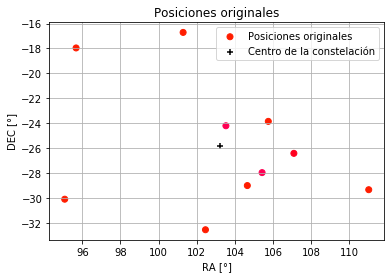

In [7]:
plt.scatter(RA,DEC, c=colors, label="Posiciones originales")
plt.scatter(l,f, c='black', marker='+', label="Centro de la constelación")
plt.grid()
plt.title("Posiciones originales")
plt.xlabel("RA [°]")
plt.ylabel("DEC [°]")
plt.legend()

Después de observar las estrellas en su longitud de onda registrada en sus posiciones originales y siendo un observador en reposo. Ahora vamos a mirar el efecto Doopler relativistico: $$\lambda_{obs} = \lambda_{em} \gamma (1-\beta\cos(\theta))$$
>Siendo $\lambda_{em}$ la longitud de onda emitida por la estrella osea la longitud de onda que recibe un observador en reposo. Siendo $\beta = \frac{v}{c}$ y $\theta$ el ángulo corrido del observador en movimiento

Aprovechando que la constelación se encuentra cerca del ecuador celeste nuestro $\theta$ lo podemos tomar solo con DEC. Sin embargo para ser un poco más exactos opte por ser un poco más geometrico, como el $\theta$ es el ángulo corrido del observador de movimiento, podemos hallar ese $\theta$ con una resta de teoremas de pitagoras, de los trtiangulos que forman la posición de la estrella y la poisición de las estrellas vista desde la nave.

In [8]:
def lamb(lam,gamma,theta):
    return lam*gamma*(1-(0.4*np.cos(theta*np.pi/180)))

# theta
k = (RA**2+DEC**2)**0.5-(tpf**2+tpr**2)**0.5

lamround1 = 5*round(lamb(tabla.lam,gamma,k)/5)
lamround1

0    395.0
1    395.0
2    460.0
3    395.0
4    395.0
5    395.0
6    395.0
7    505.0
8    395.0
9    505.0
dtype: float64

In [9]:
colors1=[cinf.hex[cinf.lamc==i].iloc[0] for i in lamround1]
colors1

['#3200ff',
 '#3200ff',
 '#0b00ff',
 '#3200ff',
 '#3200ff',
 '#3200ff',
 '#3200ff',
 '#00ff6f',
 '#3200ff',
 '#00ff6f']

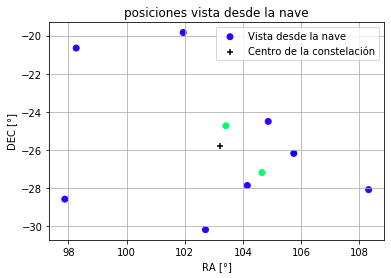

In [10]:
plt.scatter(tpr,tpf, c=colors1, label="Vista desde la nave")
plt.scatter(l,f, c='black', marker='+', label="Centro de la constelación")
plt.grid()
plt.title("posiciones vista desde la nave")
plt.xlabel("RA [°]")
plt.ylabel("DEC [°]")
plt.legend()

En el gráfico podemos apreciar el efecto Doppler relativistico, en donde si tenemos 2 observadores uno en donde está en la tierra y el otro dentro de una nave. en donde por los gráficos anteriores los dos observadores a pesar de ser las mismas estrellas los dos veran que las longitudes de ondas de las estrellas son diferente. En pocas palabras los observadores miran de diferente color a las estrellas.

#### 3. Una las dos gráficas para evidenciar los efectos de colimación y Doppler relativista al mismo tiempo.

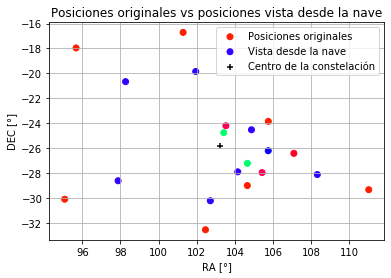

In [11]:
plt.scatter(RA,DEC, c=colors, label="Posiciones originales")
plt.scatter(tpr,tpf, c=colors1, label="Vista desde la nave")
plt.scatter(l,f, c='black', marker='+', label="Centro de la constelación")
plt.grid()
plt.title("Posiciones originales vs posiciones vista desde la nave")
plt.xlabel("RA [°]")
plt.ylabel("DEC [°]")
plt.legend()

En el gráfico podemos apreciar el efecto Doppler relativistico junto con el Beaming, en donde si tenemos un obsrvador en la nave mira que las estrellas se acercan al punto de la direccion en donde viaja y ademas capta una longitud de onda diferente. Entre más cercano uno este a la velocidad de la luz la longitud de onda de la estrella tiende al ultravioleta, pero si el observador se le da por alejarse la longitud de onda tiende al infrarojo.

#### 4. Sobre la misma gráfica (la anterior) grafique la colimación/efecto Doppler para v = 0.1c, 0.2c, 0.3c.

Repetimos los pasos del punto 1 y 2 pero variamos la veocidad reletivistica

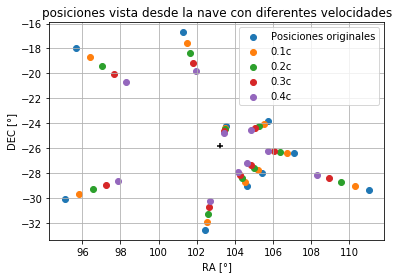

In [12]:
#pasos del punto 1
gamma1 = 1/((1-(0.1)**2)**0.5)
gamma2 = 1/((1-(0.2)**2)**0.5)
gamma3 = 1/((1-(0.3)**2)**0.5)

v = 0.4
v1 = 0.1
v2 = 0.2
v3 = 0.3

def theta3(gamma,dec,v):
    return np.arctan((np.sin(dec))/(gamma*(np.cos(dec)+v)))*180/np.pi

#gráfica
plt.scatter(RA,DEC, label="Posiciones originales")
plt.scatter(((l-theta3(gamma1,ra,v1))),(f-theta3(gamma1,dec,v1)), label="0.1c")
plt.scatter((l-theta3(gamma2,ra,v2)),(f-theta3(gamma2,dec,v2)), label="0.2c")
plt.scatter((l-theta3(gamma3,ra,v3)),(f-theta3(gamma3,dec,v3)), label="0.3c")
plt.scatter((l-theta3(gamma,ra,v)),(f-theta3(gamma,dec,v)), label="0.4c")
plt.scatter(l,f, c='black', marker='+')
plt.grid()
plt.title("posiciones vista desde la nave con diferentes velocidades")
plt.xlabel("RA [°]")
plt.ylabel("DEC [°]")
plt.legend()

In [13]:
tpf1 = ((f-theta3(gamma1,ra,v1)))
tpf2 = ((f-theta3(gamma2,ra,v2)))
tpf3 = ((f-theta3(gamma3,ra,v3)))

tpr1 = ((l-theta3(gamma1,ra,v1)))
tpr2 = ((l-theta3(gamma2,ra,v2)))
tpr3 = ((l-theta3(gamma3,ra,v3)))

In [14]:
#pasos del punto 2
def lamb1(lam,gamma,theta,v):
    a = lam*gamma*(1-(v*np.cos(theta*np.pi/180)))
    return a

#thetas
k1 = (RA**2+DEC**2)**0.5-(tpf1**2+tpr1**2)**0.5
k2 = (RA**2+DEC**2)**0.5-(tpf2**2+tpr2**2)**0.5
k3 = (RA**2+DEC**2)**0.5-(tpf3**2+tpr3**2)**0.5

lamround2 = 5*round(lamb1(tabla.lam,gamma,k1,v1)/5)
lamround3 = 5*round(lamb1(tabla.lam,gamma,k2/DEC,v2)/5)
lamround4 = 5*round(lamb1(tabla.lam,gamma,k3/DEC,v3)/5)

In [15]:
colors2=[cinf.hex[cinf.lamc==i].iloc[0] for i in lamround2]
colors3=[cinf.hex[cinf.lamc==i].iloc[0] for i in lamround3]
colors4=[cinf.hex[cinf.lamc==i].iloc[0] for i in lamround4]

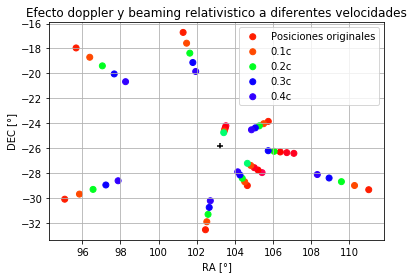

In [16]:
plt.scatter(RA,DEC,c=colors, label="Posiciones originales")
plt.scatter(((l-theta3(gamma1,ra,v1))),(f-theta3(gamma1,dec,v1)), c=colors2, label="0.1c")
plt.scatter((l-theta3(gamma2,ra,v2)),(f-theta3(gamma2,dec,v2)), c=colors3, label="0.2c")
plt.scatter((l-theta3(gamma3,ra,v3)),(f-theta3(gamma3,dec,v3)), c=colors4, label="0.3c")
plt.scatter((l-theta3(gamma,ra,v)),(f-theta3(gamma,dec,v)), c=colors1, label="0.4c")
plt.scatter(l,f, c='black', marker='+')
plt.grid()
plt.title("Efecto doppler y beaming relativistico a diferentes velocidades")
plt.xlabel("RA [°]")
plt.ylabel("DEC [°]")
plt.legend()

Con las dos gráficas anteriores observamos el efecto del beaming relativistico, cuanta más rápida sea la velocidad relativistica se acerca más al centro de la galaxia y las estrellas van cambiando de longitud de onda (color) por la verlocidad en la que se acercan y también por la posición de los ángulos.

>Recordemos que las estrellas tienden hacer moradas porque nos estamos acercando a un punto fijo con velocidades cercanas a la de la luz.